## multiple-regression-model

## BUSINESS PROBLEM

Homes universal is a real estate agency that helps buyers get houses and sellers get the right prices for their houses. As a data scientist I have been tasked with coming up with insights that will enable the firm come up with the best prices based on different aspects or characteristics of the houses available and at the same time explain to the buyers the reason for the pricing of certain houses.In order to come up with clear insights that will have impact ,I will apply my analysis based on polynomial regression and Multiple regression modeling.I came up with the following questions to help guide me during my analysis.The aim of this project is to develop a multiple regression model than can predict a house's price

1. How do various factors such as the number of bedrooms, bathrooms, floors, impact the prices of the houses?
2. Does the square footage (sqft_living) have a significant impact on the prices of the houses?

## DATA UNDERSTANDING

# The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. A full description of the dataset's columns can be found below.

1.Column Names and descriptions for King County Data Set

2.id - unique identified for a house

3.dateDate - house was sold

4.pricePrice - is prediction target

5.bedroomsNumber - of Bedrooms/House

6.bathroomsNumber - of bathrooms/bedrooms

7.sqft_livingsquare - footage of the home

8.sqft_lotsquare - footage of the lot

9.floorsTotal - floors (levels) in house

10.waterfront - House which has a view to a waterfront

11.view - Has been viewed

12.condition - How good the condition is ( Overall )

13.grade - overall grade given to the housing unit, based on King County grading system

14.sqft_above - square footage of house apart from basement

15.sqft_basement - square footage of the basement

16.yr_built - Built Year

17.yr_renovated - Year when house was renovated

18.zipcode - zip

19.lat - Latitude coordinate

20.long - Longitude coordinate

21.sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

22.sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Interpretation of The Model

1.How do various factors such as the nuber of bedrooms, bathrooms, floors, and overall condition of the house impact the prices of the houses?

From our multiple linar rgression model, the coefficient estimates provides insights into the relationship between the independent variable and the target variable. So a positive coefficient for th factors above reflects on the prices in that it is higher for houses with higher positive coefficients in these factors from the model.

2.Does the square footage (sqft_living) hav a significant impact on the prices of the houses?

Th coefficient estimate for the 'sqft_living' variable in the multiple linear regression model indicates the change in the price associated with a one unit incease in square footage,assuming all other variables remain constant. A positive coefficient suggests that an increase in square footage is associatd with higherhouse prices, while a negative coefficient would idicate the opposite. 

# Conclusion

We can therefore see that there are certain features and factors that influence the price of particular houses such as the the number of rooms(bedrooms, bathrooms, living areas etc) and the sqft_living spaces. Houses that are in good condition overall, and have a lot of rooms ultimately go for higher prices and the opposite is also true. Houses that have a large sqft_living also go for higher prices as most people tend to appreciate the size and space that these houses contain.

# Recommendations

1. Home Universal should invest in maintaning the overall conditions of the houses they are trying to sell

2. The sellers should invest in particularly advertising houses that contain more rooms as those go for higher prices.

3. The sellers should also focus on houses with a particularly large living space as those also go for higher prices.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

import statsmodels.api as sm
import scipy.stats as stats

#from statsmodels.graphics.gofplots import probplot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## LOADING THE DATASET

In [2]:
data = pd.read_csv('kc_house_data.csv')


## DATA UNDERSTANDING

In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [49]:
#getting inforation about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      0 non-null      float64
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#number of rows and columns in the dataset
data.shape

(21597, 21)

In [6]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## DATA CLEANING

In [7]:
data.isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
data.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2376
view                63
condition        21597
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated      3842
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [25]:
data["condition"].unique()

array([nan])

In [24]:
#dropping rows with missing values
data ['sqft_basement'].value_counts(dropna = False)

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [9]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long       

In [10]:
columns_to_convert = ['condition']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [11]:
data['condition'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: condition
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 168.9 KB


REGRESSION ANALYSIS

In [26]:
# Select the independent variables (features) and the dependent variable (target)
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'floors']] 
# Update with relevant column names
y = data['price'] # Update with the target column name


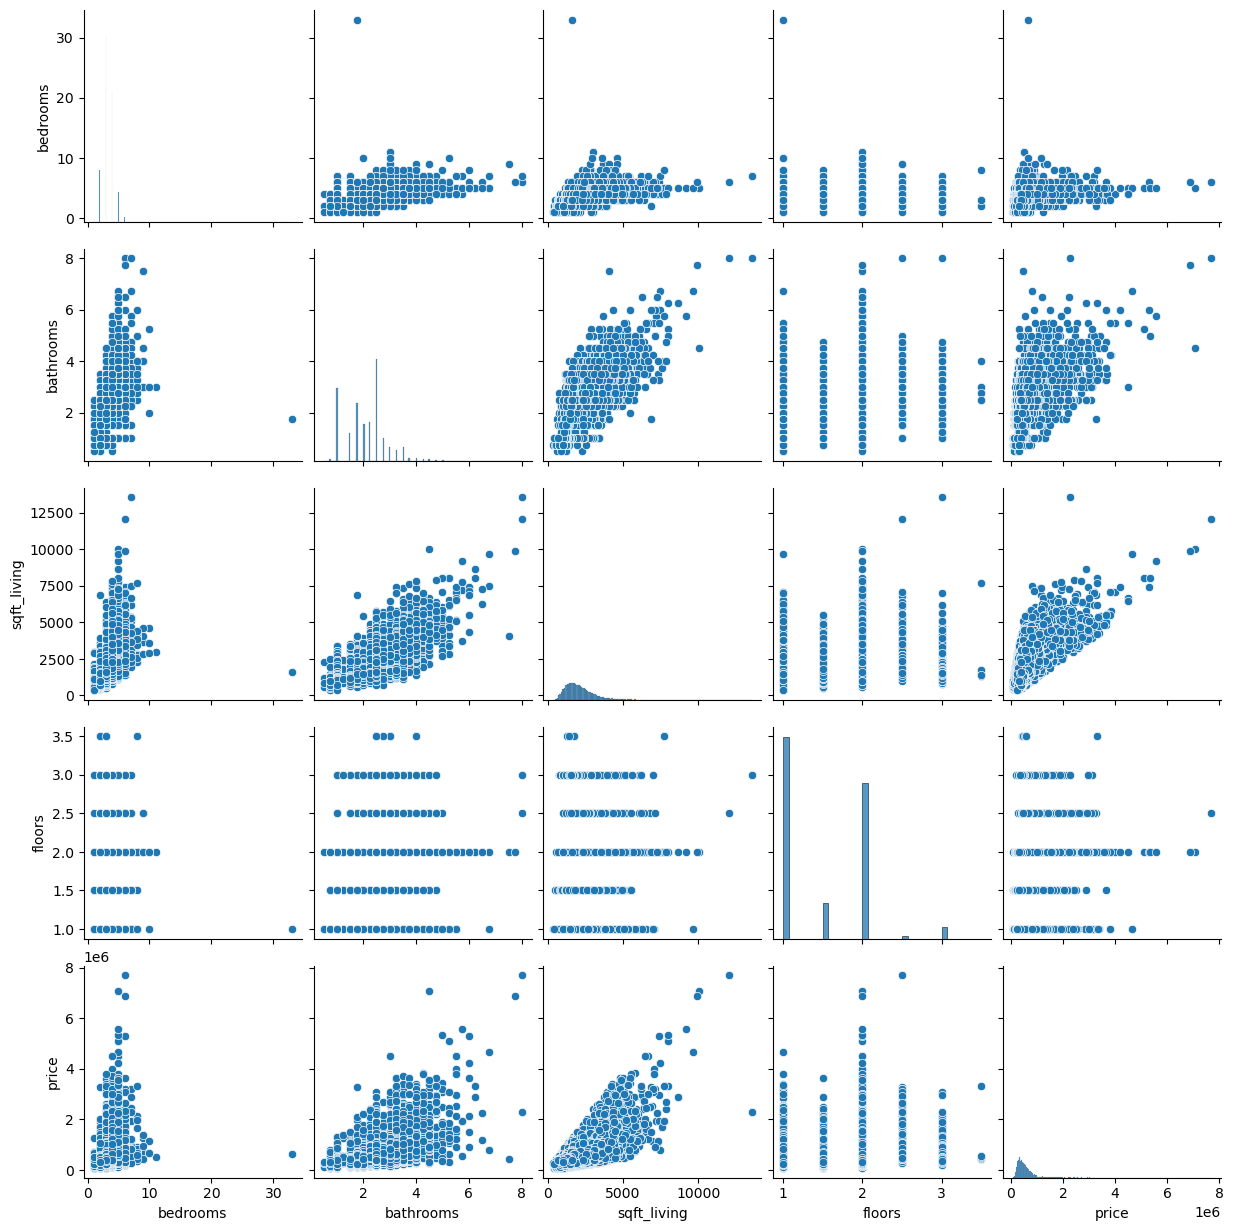

In [27]:
# Data Visualization
sns.pairplot(data[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'price']])
plt.show()


In [28]:
# Add a constant column to the independent variables matrix (required for regression)
X = sm.add_constant(X)


In [29]:
import numpy as np

X = np.asarray(X)
y = np.asarray(y)

In [30]:
print(X.dtype)
print(y.dtype)

float64
float64


In [31]:
# Check for missing values
print(np.isnan(X).sum())

# Check for infinite values
print(np.isinf(X).sum())

0
0


In [32]:
# handling missing values
X = X[~np.isnan(X).any(axis=1) & ~np.isinf(X).any(axis=1)]


In [33]:
print(X.shape)
print(y.shape)

(21597, 5)
(21597,)


In [20]:
print(X)
print(y)

[]
[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [34]:



# Fit the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()


In [35]:
# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5550.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:45:20   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21592   BIC:                         5.996e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.587e+04   7707.527      9.843      0.0

## POLYNOMIAL REGRESSION

In [37]:
# Feature Engineering: Polynomial Regression
poly_features = PolynomialFeatures(degree=2)

X_poly = poly_features.fit_transform(X[:, 1:]) # Exclude the constant column


In [38]:
# Fit the polynomial regression model
model_poly = sm.OLS(y, X_poly)
results_poly = model_poly.fit()


In [39]:
# Print the polynomial regression results
print(results_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     1863.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:53:53   Log-Likelihood:            -2.9884e+05
No. Observations:               21597   AIC:                         5.977e+05
Df Residuals:                   21582   BIC:                         5.978e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.224e+05   2.56e+04     12.594      0.0

In [40]:
# Model Evaluation
y_pred = results_poly.predict(X_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)


In [41]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 61112542008.29
R-squared (R2): 0.55


C:\Users\User-ADMIN\AppData\Local\Temp\ipykernel_3452\173598958.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


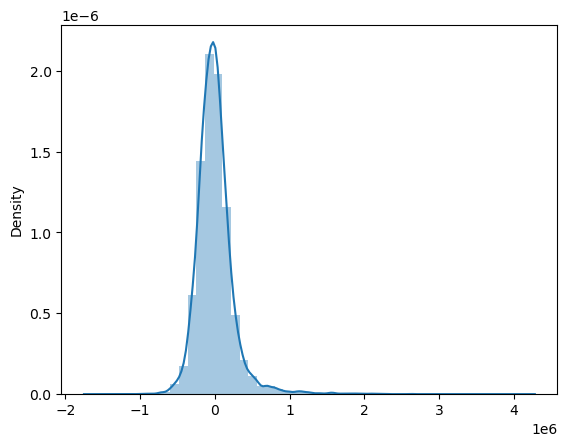

In [43]:
#showing the test for normality
residuals= results.resid
sns.distplot(residuals)
plt.show()

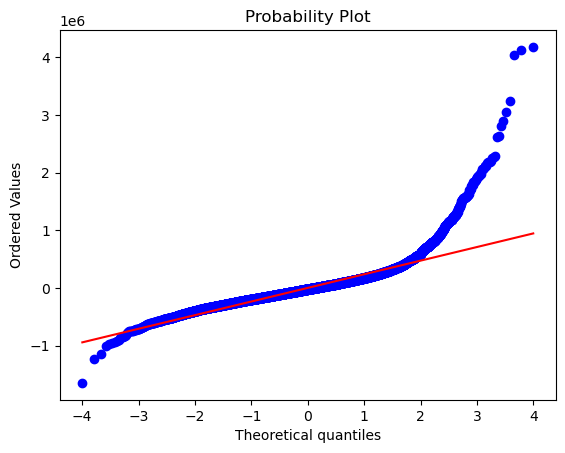

In [48]:
# homoscedacity
stats.probplot(residuals, dist = stats.norm, plot = plt)
plt.show()